Importing all the required python libraries



In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

Loading the data


In [212]:
data = pd.read_csv('/content/HR_dataset.csv')

Data **Exploration**

In [213]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Data **Preprocessing**

In [182]:
data.drop(
    ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],
    axis="columns",
    inplace=True
)

In [90]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [183]:
data=data.dropna()

In [184]:
data=data.drop_duplicates()

In [185]:
data.shape


(1470, 31)

In [207]:
#Feature Encoding
categorical_cols = data.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [208]:
categorical_cols = data.select_dtypes(include='object').columns

#one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols)

In [209]:
# Feature scaling
scaler = StandardScaler()
numerical_features = data.select_dtypes(include='number').columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Data **Analysis**

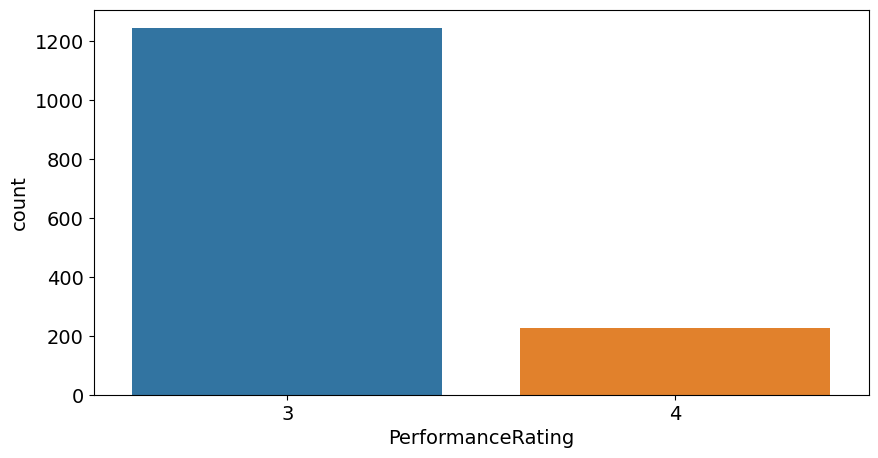

In [214]:
plt.figure(figsize=(10,5))
plt.rc("font", size=14)
sns.countplot(x ='PerformanceRating',data=data)
plt.show()

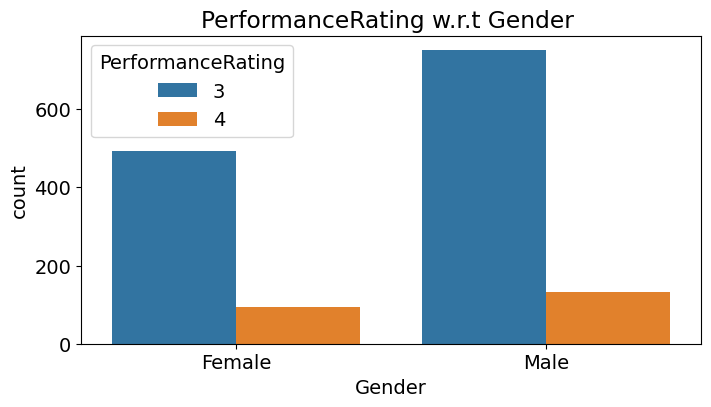

In [215]:
plt.figure(figsize=(8,4))
sns.countplot(x='Gender',hue='PerformanceRating', data=data)
plt.title("PerformanceRating w.r.t Gender ")
plt.show()

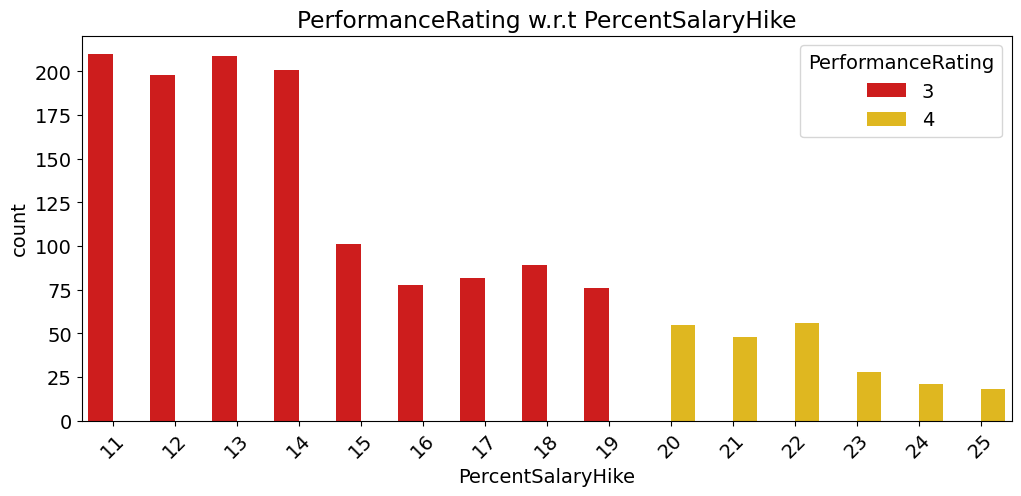

In [216]:
plt.figure(figsize=(12,5))
sns.countplot(x='PercentSalaryHike',hue='PerformanceRating', data=data, palette='hot')
plt.title("PerformanceRating w.r.t PercentSalaryHike")
plt.xticks(rotation=45)
plt.show()

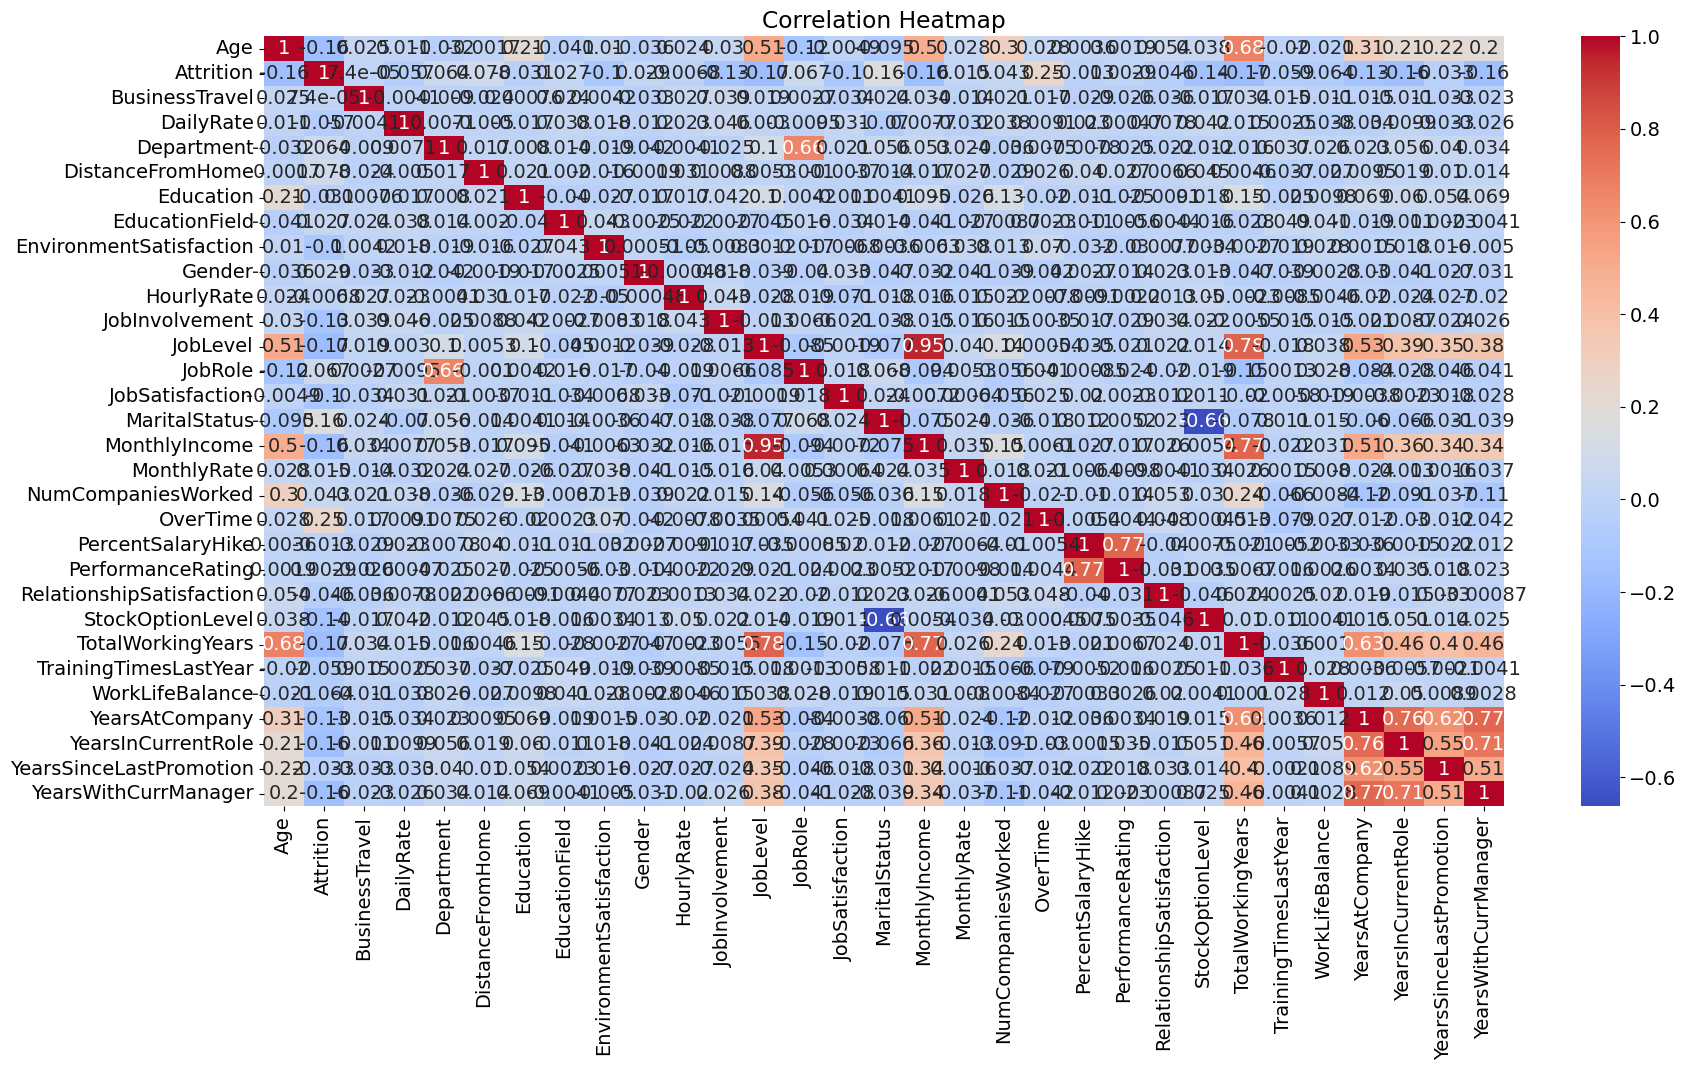

In [192]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [77]:
data.corr()

<ipython-input-77-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


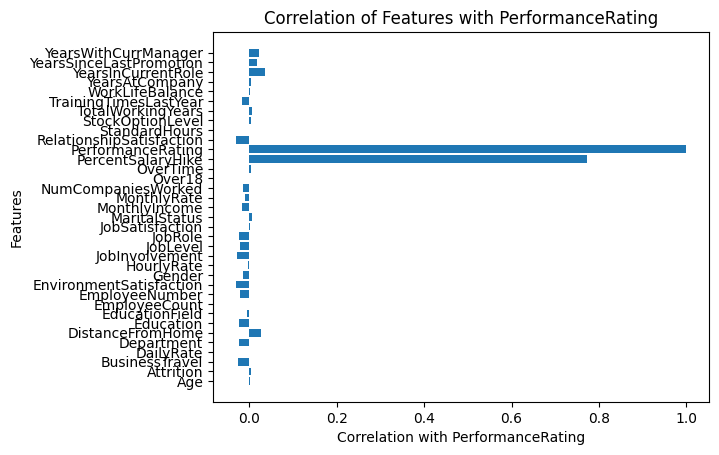

In [118]:
# Calculating correlation of each feature with the 'PerformanceRating' column
correlation_with_target = data.corrwith(data['PerformanceRating'])


plt.barh(correlation_with_target.index, correlation_with_target.values)
plt.xlabel('Correlation with PerformanceRating')
plt.ylabel('Features')
plt.title('Correlation of Features with PerformanceRating')
plt.show()

Model **Selection**

Data **Splitting**

In [193]:
X = data.drop(columns=['PerformanceRating'])
y = data['PerformanceRating']

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [195]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 30)
(1176,)
(294, 30)
(294,)


Model **Traning**

In [196]:
# Using Linear Regression as the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


# Using Random Forest Regression as the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model **Evalution**

In [197]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

# Evaluating Linear Regression Model
linear_mse, linear_rmse, linear_r2 = evaluate_model(linear_model, X_test, y_test)

# Evaluating Random Forest Regression Model
rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_model, X_test, y_test)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {linear_mse}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse}")
print(f"R-squared (R²): {linear_r2}\n")

print("Random Forest Regression Model:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R-squared (R²): {rf_r2}")

Linear Regression Model:
Mean Squared Error (MSE): 0.37063543464310894
Root Mean Squared Error (RMSE): 0.6087983530226646
R-squared (R²): 0.6138166269348571

Random Forest Regression Model:
Mean Squared Error (MSE): 6.411842655233878e-30
Root Mean Squared Error (RMSE): 2.5321616566155246e-15
R-squared (R²): 1.0


Model **Fine-tuning**

In [198]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)


grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_

# Evaluating the best model
best_rf_mse, best_rf_rmse, best_rf_r2 = evaluate_model(best_rf_model, X_test, y_test)

print("Best Random Forest Regression Model:")
print(f"Mean Squared Error (MSE): {best_rf_mse}")
print(f"Root Mean Squared Error (RMSE): {best_rf_rmse}")
print(f"R-squared (R²): {best_rf_r2}")


Best Random Forest Regression Model:
Mean Squared Error (MSE): 3.1360847495518935e-30
Root Mean Squared Error (RMSE): 1.7708994182482227e-15
R-squared (R²): 1.0


In [53]:
!pip install joblib

In [199]:
import joblib
best_model=best_rf_model
joblib.dump(best_rf_model, 'trained_model.joblib')

['trained_model.joblib']

In [200]:
feature_importances = best_rf_model.feature_importances_


feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

                     Feature    Importance
20         PercentSalaryHike  1.000000e+00
16             MonthlyIncome  3.982209e-16
3                  DailyRate  2.740665e-16
17               MonthlyRate  1.735079e-16
10                HourlyRate  1.681146e-16
11            JobInvolvement  1.037244e-16
23         TotalWorkingYears  8.836740e-17
24     TrainingTimesLastYear  5.429992e-17
13                   JobRole  5.417666e-17
27        YearsInCurrentRole  5.292972e-17
28   YearsSinceLastPromotion  5.215895e-17
5           DistanceFromHome  3.736560e-17
0                        Age  2.797386e-17
6                  Education  9.555378e-18
2             BusinessTravel  8.932744e-18
14           JobSatisfaction  5.195486e-18
18        NumCompaniesWorked  4.617836e-18
29      YearsWithCurrManager  4.574219e-18
26            YearsAtCompany  2.810789e-18
21  RelationshipSatisfaction  6.022595e-19
7             EducationField  3.379814e-19
1                  Attrition  0.000000e+00
19         

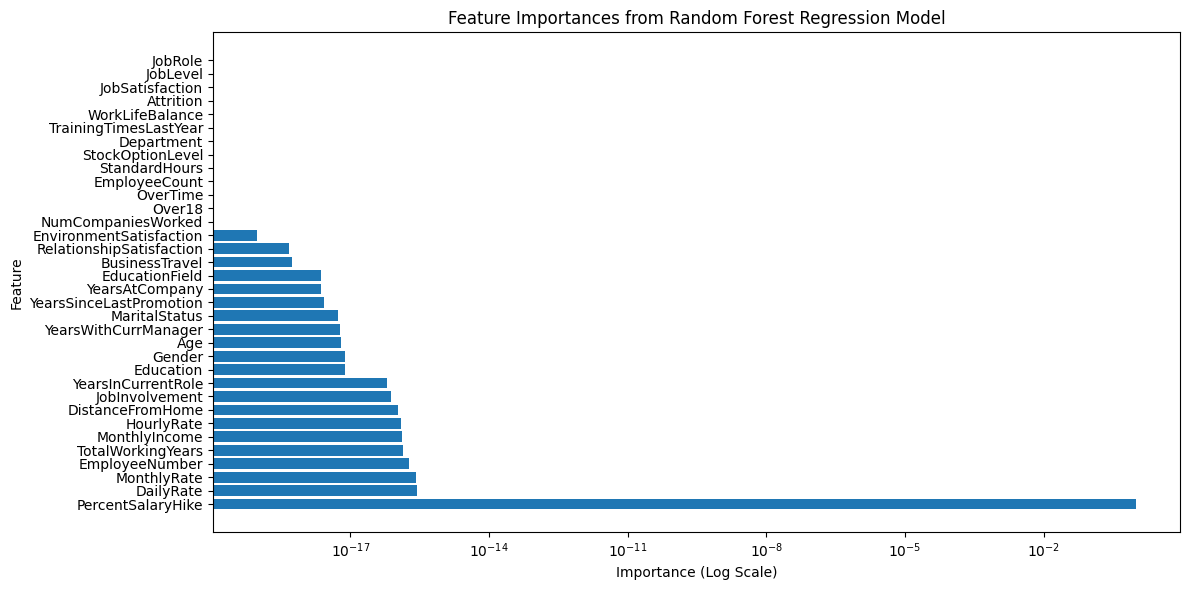

In [129]:
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xscale('log')
plt.xlabel('Importance (Log Scale)')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Regression Model')
plt.tight_layout()
plt.show()


Loading the trained model

In [201]:
# Loading the trained model
rf_regressor = joblib.load('trained_model.joblib')

In [202]:
data = data[X_train.columns]

In [203]:
new_predictions = rf_regressor.predict(data)

In [204]:
print(new_predictions)

[-0.42623002  2.34615106 -0.42623002 ...  2.34615106 -0.42623002
 -0.42623002]


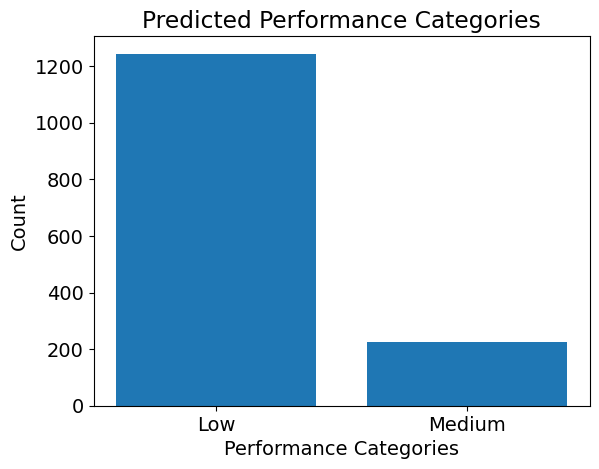

In [205]:
low_threshold = 2.0
high_threshold = 4.0


predicted_categories = np.where(new_predictions < low_threshold, 'Low',
                                np.where(new_predictions > high_threshold, 'High', 'Medium'))

category_counts = np.unique(predicted_categories, return_counts=True)

plt.bar(category_counts[0], category_counts[1])
plt.xlabel('Performance Categories')
plt.ylabel('Count')
plt.title('Predicted Performance Categories')
plt.show()